<a href="https://colab.research.google.com/github/PeterRutkowski/fer/blob/master/paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# data split 0.7
loaded = np.load('drive/My Drive/project42/kdef.npz', allow_pickle=True)
x_train, y_train = np.expand_dims(loaded['x_train'], axis=3), loaded['y_train']
x_val, y_val = np.expand_dims(loaded['x_val'], axis=3), loaded['y_val']
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(686, 100, 100, 1) (686, 7) (294, 100, 100, 1) (294, 7)


In [ ]:
cnn = keras.Sequential(
  [   
    layers.Input(shape=(100,100,1,)),

    layers.Conv2D(filters=20, kernel_size=(5,5), strides=(1,1), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(filters=40, kernel_size=(5,5), strides=(1,1), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
    layers.Conv2D(filters=60, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(filters=30, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
   
    layers.Dense(100),
    layers.BatchNormalization(),
    layers.Activation('relu'),
   
    layers.Flatten(),
    layers.Dense(7, activation='softmax'),
  ]
)

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 20)      520       
_________________________________________________________________
batch_normalization_5 (Batch (None, 100, 100, 20)      80        
_________________________________________________________________
activation_5 (Activation)    (None, 100, 100, 20)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 20)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 40)        20040     
_________________________________________________________________
batch_normalization_6 (Batch (None, 50, 50, 40)        160       
_________________________________________________________________
activation_6 (Activation)    (None, 50, 50, 40)       

In [ ]:
initial_learning_rate = 0.1
decay_rate = 0.01
decay_steps = 1.0
n_epochs = 500
batch_size = 686

learning_rate_fn = keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate, decay_steps, decay_rate)

cnn.compile(optimizer=keras.optimizers.SGD(
                  learning_rate=learning_rate_fn), loss='categorical_crossentropy', metrics=['accuracy'])

filepath = 'drive/My Drive/project42/cnn.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

cnn.fit(x=x_train,
    y=y_train,
    batch_size=294,
    epochs=n_epochs,
    verbose=1,
    callbacks=callbacks_list,
    validation_split=0.0,
    validation_data=(x_val,y_val),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=686/batch_size,
    validation_steps=294/batch_size,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,)

cnn.save('drive/My Drive/project42/cnn.h5')

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 2.2830 - accuracy: 0.1769
Epoch 00001: val_accuracy improved from -inf to 0.15306, saving model to drive/My Drive/project42/cnn.h5
1/1 [==============================] - 2s 2s/step - loss: 2.2830 - accuracy: 0.1769 - val_loss: 131.2524 - val_accuracy: 0.1531
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 22.6936 - accuracy: 0.1395
Epoch 00002: val_accuracy did not improve from 0.15306
1/1 [==============================] - 0s 104ms/step - loss: 22.6936 - accuracy: 0.1395 - val_loss: 125424.5156 - val_accuracy: 0.1531
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 28.4890 - accuracy: 0.0816
Epoch 00003: val_accuracy did not improve from 0.15306
1/1 [==============================] - 0s 102ms/step - loss: 28.4890 - accuracy: 0.0816 - val_loss: 48026.5078 - val_accuracy: 0.1224
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 17.4684 - accuracy: 0.1633
Epoch 00004: 

[1 0 0 0 0 0 0] [[9.637e-01 0.000e+00 1.400e-03 1.100e-02 1.000e-04 9.300e-03 1.450e-02]]


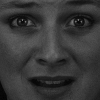

[0 1 0 0 0 0 0] [[1.600e-03 9.919e-01 3.200e-03 0.000e+00 1.000e-04 2.700e-03 5.000e-04]]


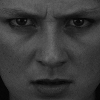

[0 0 1 0 0 0 0] [[2.000e-04 1.150e-02 9.877e-01 0.000e+00 0.000e+00 6.000e-04 0.000e+00]]


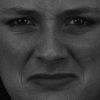

[0 0 0 1 0 0 0] [[2.000e-04 0.000e+00 3.000e-04 9.995e-01 0.000e+00 0.000e+00 0.000e+00]]


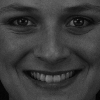

[0 0 0 0 1 0 0] [[0.000e+00 0.000e+00 0.000e+00 1.000e-04 9.995e-01 3.000e-04 0.000e+00]]


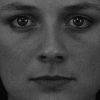

[0 0 0 0 0 1 0] [[3.070e-02 2.320e-02 7.000e-04 2.000e-04 0.000e+00 9.451e-01 0.000e+00]]


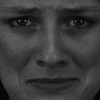

[1 0 0 0 0 0 0] [[0.9854 0.0078 0.     0.     0.     0.0055 0.0013]]


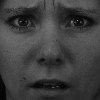

[0 0 0 1 0 0 0] [[0. 0. 0. 1. 0. 0. 0.]]


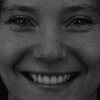

[0 0 0 0 1 0 0] [[3.000e-04 0.000e+00 0.000e+00 3.000e-04 9.951e-01 4.200e-03 1.000e-04]]


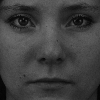

[0 0 0 0 0 0 1] [[0.0053 0.     0.     0.     0.     0.     0.9947]]


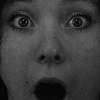

[1 0 0 0 0 0 0] [[0.9836 0.     0.0061 0.0094 0.     0.001  0.    ]]


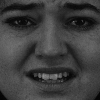

[0 1 0 0 0 0 0] [[2.000e-04 9.977e-01 2.000e-03 0.000e+00 0.000e+00 1.000e-04 0.000e+00]]


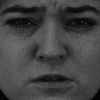

[0 0 1 0 0 0 0] [[1.00e-02 2.20e-03 9.87e-01 7.00e-04 0.00e+00 0.00e+00 0.00e+00]]


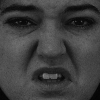

[0 0 0 1 0 0 0] [[2.200e-03 0.000e+00 0.000e+00 9.937e-01 1.000e-04 4.000e-03 0.000e+00]]


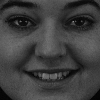

[0 0 0 0 1 0 0] [[4.000e-04 5.000e-04 1.000e-04 5.000e-04 9.544e-01 1.920e-02 2.480e-02]]


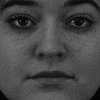

[0 0 0 0 0 1 0] [[5.600e-03 1.000e-04 1.100e-03 1.800e-03 2.060e-02 9.706e-01 2.000e-04]]


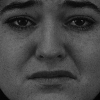

[0 1 0 0 0 0 0] [[6.000e-04 9.905e-01 4.600e-03 0.000e+00 1.500e-03 2.600e-03 1.000e-04]]


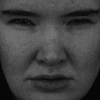

[0 0 0 0 1 0 0] [[2.500e-03 1.800e-03 1.000e-04 5.600e-03 9.732e-01 1.520e-02 1.600e-03]]


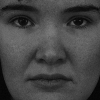

[0 0 0 0 0 1 0] [[3.300e-03 3.000e-04 2.000e-04 1.600e-03 2.260e-02 9.715e-01 6.000e-04]]


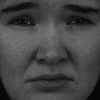

[0 0 0 0 0 0 1] [[0.0101 0.     0.     0.0026 0.016  0.0013 0.9699]]


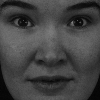

[1 0 0 0 0 0 0] [[0.9791 0.0056 0.     0.     0.     0.0151 0.    ]]


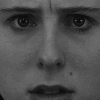

[0 1 0 0 0 0 0] [[2.000e-04 9.989e-01 1.000e-04 0.000e+00 1.000e-04 7.000e-04 0.000e+00]]


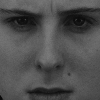

[0 0 0 1 0 0 0] [[5.000e-04 0.000e+00 0.000e+00 9.987e-01 2.000e-04 6.000e-04 0.000e+00]]


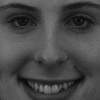

[0 0 0 0 1 0 0] [[2.000e-04 0.000e+00 0.000e+00 5.000e-04 9.982e-01 1.100e-03 0.000e+00]]


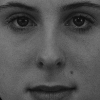

In [ ]:
cnn = load_model('drive/My Drive/project42/cnn.h5')

for i in range(24):
  c = np.expand_dims(x_train[i], axis=0)
  print(y_train[i], np.round(cnn.predict(c),4))
  cv2_imshow(x_train[i])